### Statement:



Your task is to predict whether a person makes over 50K a year or not.

Please use 2 algorithms except linear/logistic regression as we discussed and share back your results in 48 hours with your description of which Model/algorithm you think works better.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Columns are not present in csv file so, we need to set it.
col = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [3]:
col

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [4]:
# Load data from csv file
data = pd.read_csv('adult.data',header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# set the columns to data frame
data.columns = col

In [7]:
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Preprocessing

In [8]:
# Get the 5 number summary from data
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# check for the nulls
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
# check all details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Get the correlation between attribute
corr = data.corr()
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


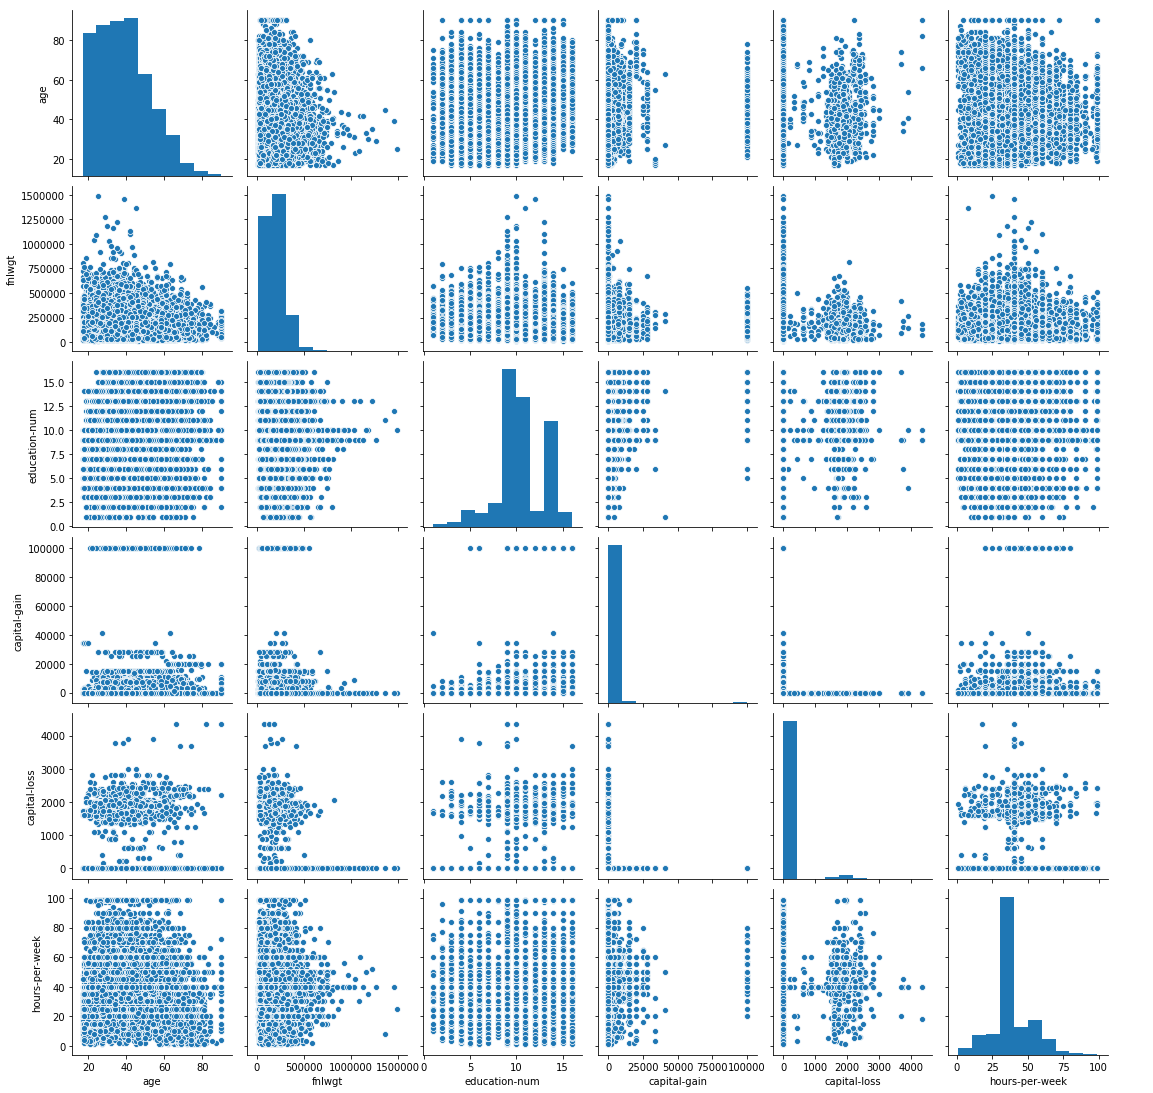

In [12]:
# Plot the data
sns.pairplot(data)


In [13]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Encoding

In [16]:
# We have 9 object type feature, so we need to convert them to str first
# and then we can apply label encoding on all categorical features.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [17]:
objFeatures = data.select_dtypes(include="object").columns

In [18]:
objFeatures

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [19]:
# total object type features
len(objFeatures)

9

In [20]:
# convert featires type to str and then apply label encoding
for feat in objFeatures:
    data[feat] = data[feat].astype('str')
    data[feat] = le.fit_transform(data[feat])

In [21]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


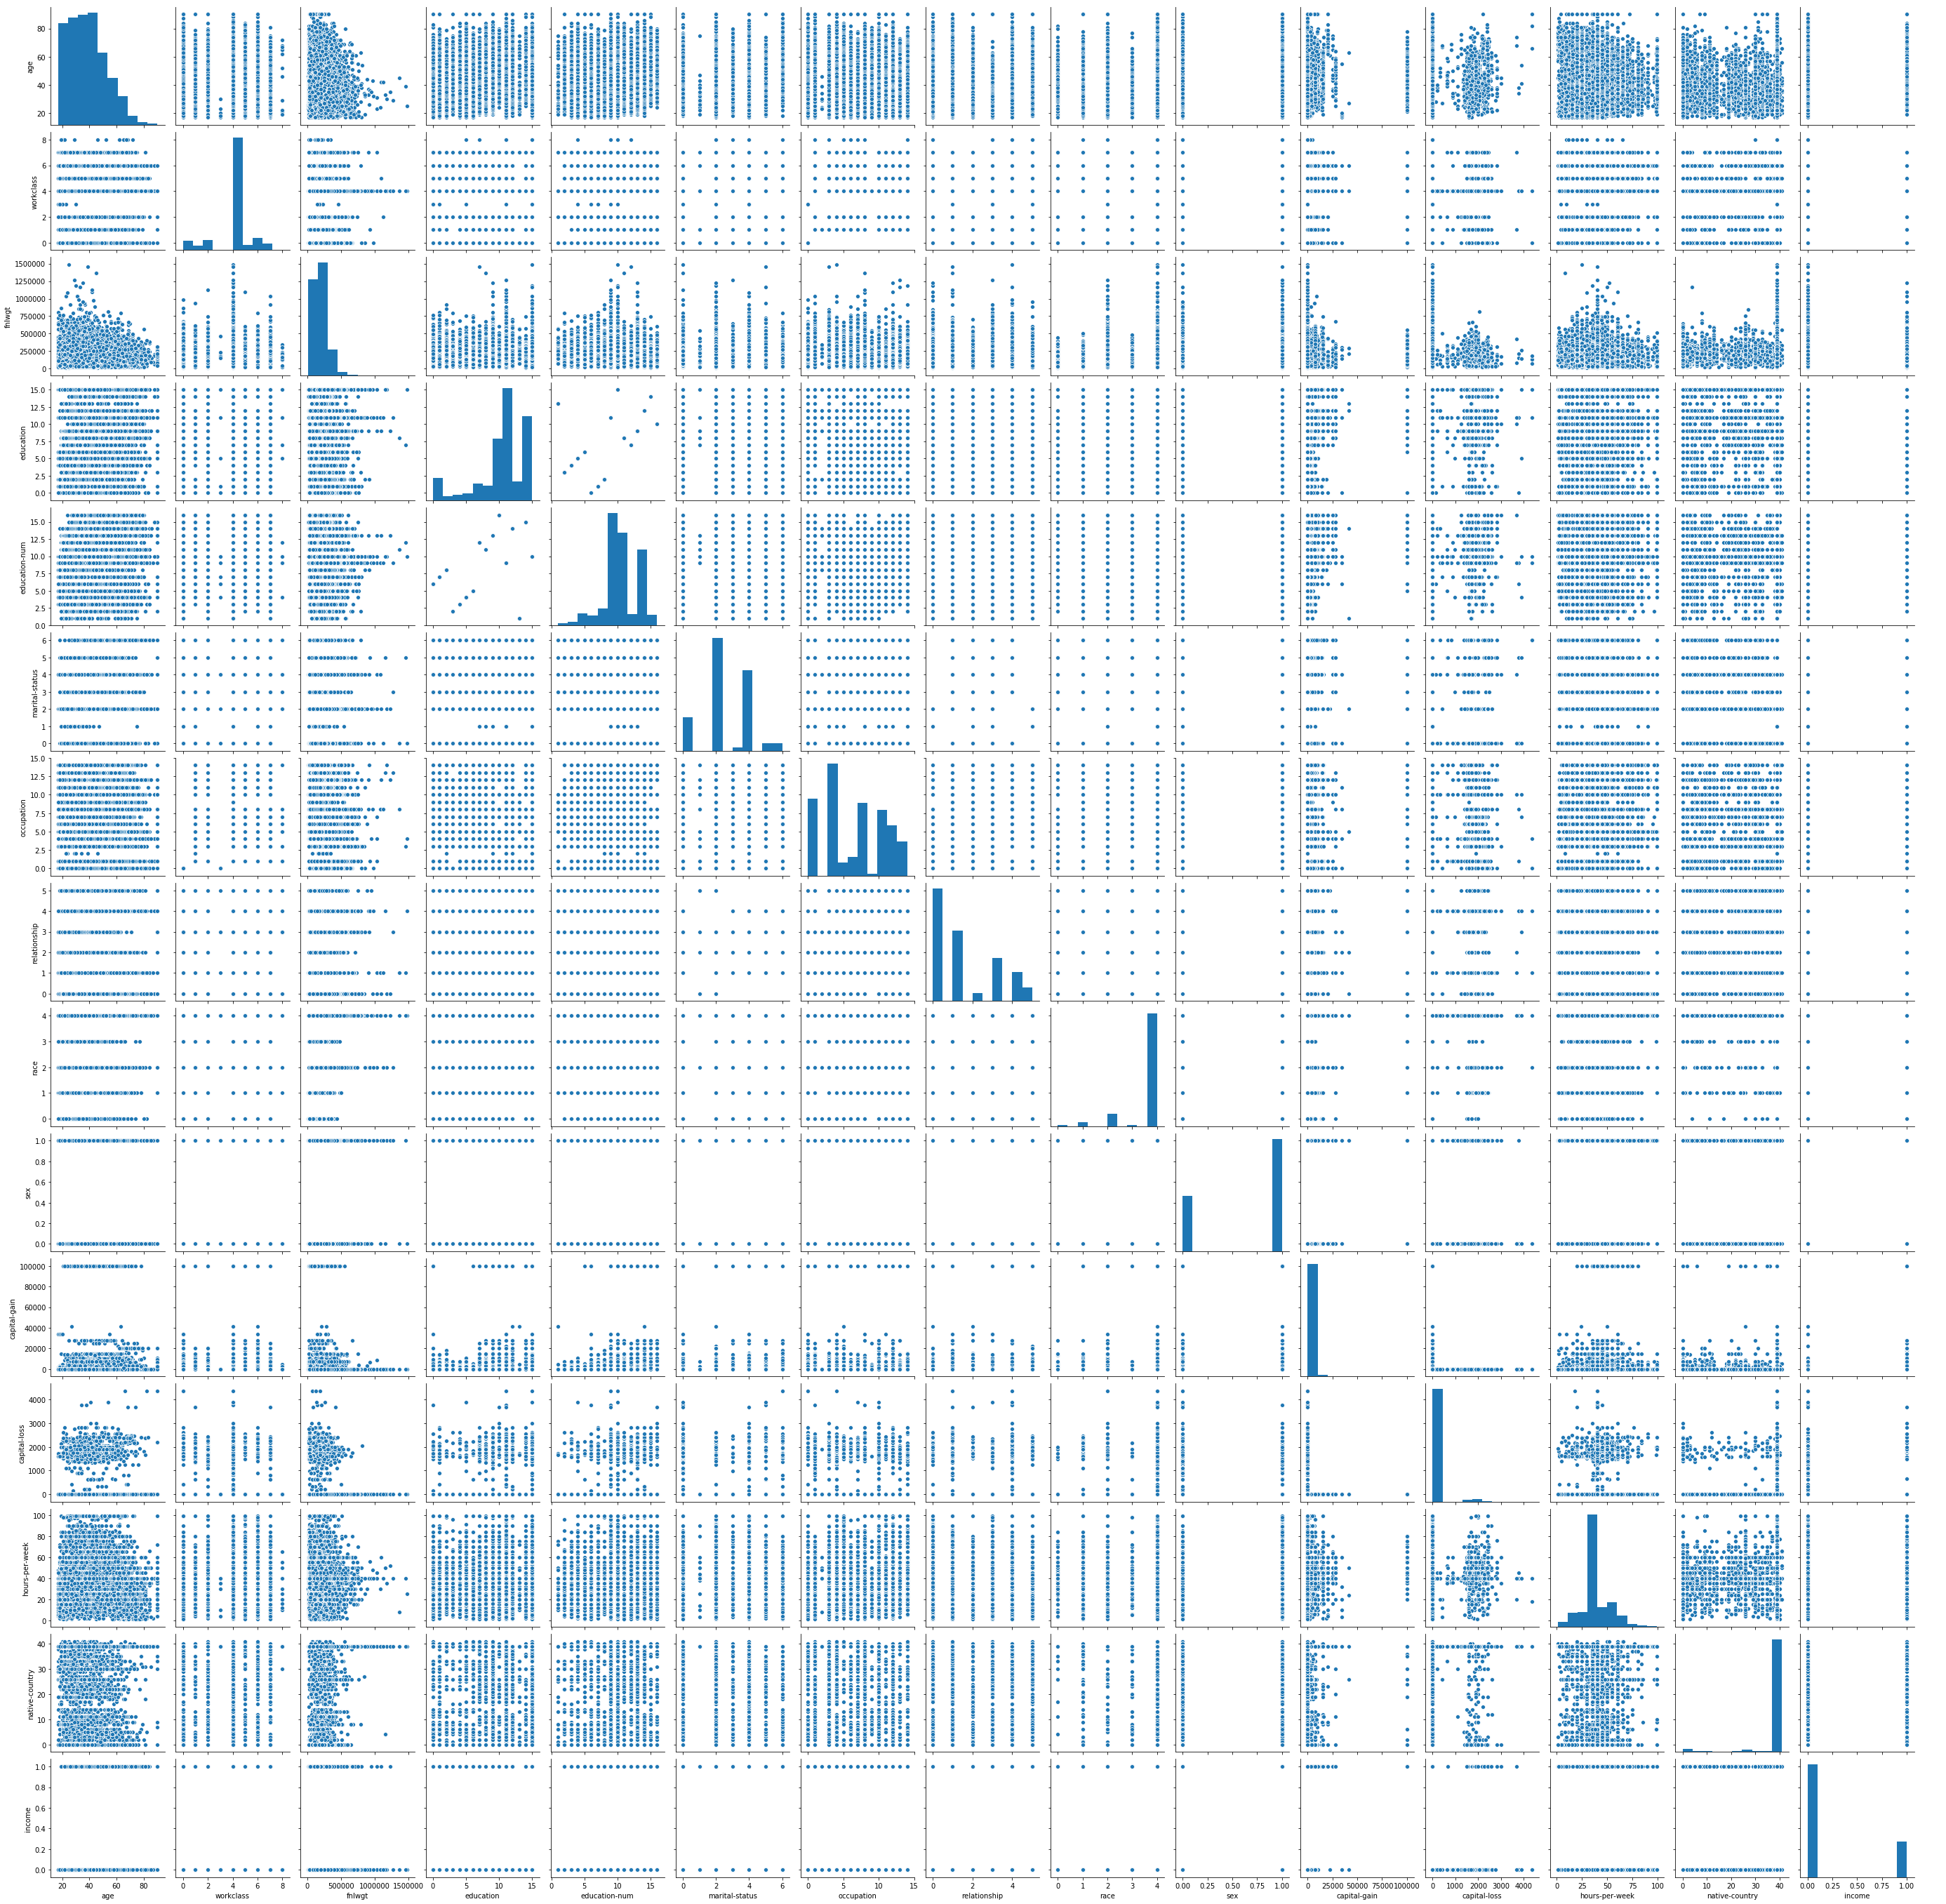

In [22]:
sns.pairplot(data)

In [23]:
# all features are now in int64 format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education         32561 non-null int64
education-num     32561 non-null int64
marital-status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null int64
income            32561 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [24]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [25]:
# Data Need to be Scaled
# apply a standard scalar to scale the all dataexcept target attribute
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
x = data.drop('income', axis=1)
y = data['income']

In [27]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [29]:
sc.fit(x)
df = sc.fit_transform(x)
df_x = pd.DataFrame(df)

In [30]:
df_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.291569
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.291569
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.291569
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.291569
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

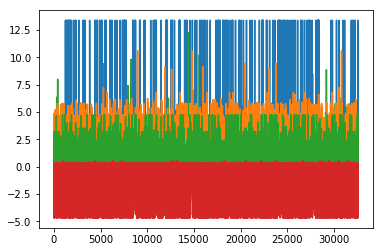

In [32]:
plt.plot(df_x)

In [33]:
# Split train and test
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(df_x,y)

In [34]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(24420, 14)
(8141, 14)
(24420,)
(8141,)


In [35]:
# build model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [36]:
# get accuracy , classification Report and confusion matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [37]:
def svm(xtrain, ytrain):
    model_svm = SVC()
    model_svm.fit(xtrain,ytrain)
    pred = model_svm.predict(xtest)
    ac = accuracy_score(pred,ytest)
    cr = classification_report(pred,ytest)
    cm = confusion_matrix(pred,ytest)
    print("Analysis of SVM:")
    print("Accuracy:")
    print(ac)
    print("Classififcation Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)
    #sns.heatmap(cm, annot=True,fmt='.0f',)
    return ac


In [38]:
def dt(xtrain, ytrain):
    
    model_dt = DecisionTreeClassifier()
    model_dt.fit(xtrain,ytrain)
    pred = model_dt.predict(xtest)
    ac = accuracy_score(pred,ytest)
    cr = classification_report(pred,ytest)
    cm = confusion_matrix(pred,ytest)
    print("Analysis of Decision Tree:")
    print("Accuracy:")
    print(ac)
    print("Classififcation Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)
    #sns.heatmap(cm, annot=True,fmt='.0f',)
    return ac


In [39]:
def rf(xtrain, ytrain):
    
    model_rf = RandomForestClassifier()
    model_rf.fit(xtrain,ytrain)
    pred = model_rf.predict(xtest)
    ac = accuracy_score(pred,ytest)
    cr = classification_report(pred,ytest)
    cm = confusion_matrix(pred,ytest)
    print("Analysis of Random Forest:")
    print("Accuracy:")
    print(ac)
    print("Classififcation Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True,fmt='.0f',)
    return ac

In [40]:
def nb(xtrain, ytrain):
    
    model_nb = GaussianNB()
    model_nb.fit(xtrain,ytrain)
    pred = model_nb.predict(xtest)
    ac = accuracy_score(pred,ytest)
    cr = classification_report(pred,ytest)
    cm = confusion_matrix(pred,ytest)
    print("Analysis of Naive Bayes:")
    print("Accuracy:")
    print(ac)
    print("Classififcation Report:")
    print(cr)
    print("Confusion Matrix:")
    print(cm)
    #sns.heatmap(cm, annot=True,fmt='.0f',)
    return ac

Analysis of SVM:
Accuracy:
0.8556688367522417
Classififcation Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      6696
           1       0.57      0.78      0.66      1445

    accuracy                           0.86      8141
   macro avg       0.76      0.82      0.78      8141
weighted avg       0.88      0.86      0.86      8141

Confusion Matrix:
[[5845  851]
 [ 324 1121]]
Analysis of Decision Tree:
Accuracy:
0.8066576587642795
Classififcation Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6063
           1       0.63      0.60      0.61      2078

    accuracy                           0.81      8141
   macro avg       0.75      0.74      0.74      8141
weighted avg       0.80      0.81      0.80      8141

Confusion Matrix:
[[5329  734]
 [ 840 1238]]
Analysis of Random Forest:
Accuracy:
0.8613192482496008
Classififcation Report:
              precision   

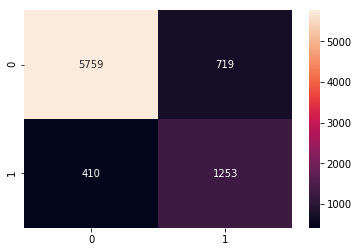

In [41]:
classifier_accuracy = {'svm': None,
                    'decision_t': None,
                    'random_f': None,
                    'naive_b': None}

classifier_accuracy['svm'] = svm(xtrain,ytrain)
classifier_accuracy['decision_t'] = dt(xtrain,ytrain)
classifier_accuracy['random_f'] = rf(xtrain,ytrain)
classifier_accuracy['naive_b'] = nb(xtrain,ytrain)
    

In [42]:
for i, j in classifier_accuracy.items():
    print("{}: {} ".format(i,j))

random_f: 0.8613192482496008 
decision_t: 0.8066576587642795 
svm: 0.8556688367522417 
naive_b: 0.8042009581132539 


#### Results:

In terms of accuracy :
    Decision Tree gives accuracy : 80.66 %
    
    Random Forest Gives Accuracy : 86.13 %
    
    Navive Bayes Gives Acuracy : 80.42 %
        
    SVM Gives Accuracy : 85.56 %

Out of all above Algorithms Random Forest gives us Higher Accuracy. So I can say that for used dataset Random forest has given the best accuracy measure.